# Projet Big Data : Partie 1

## I] Collecte de données et étiquetage et annotation :

In [3]:
import os
def create_folder():
    if not os.path.exists('images'):
        os.makedirs('images')
    return

create_folder()

In [5]:
#Get our images on wikidata by a request
import sys
import pandas as pd
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

# Get cities
query = """SELECT DISTINCT ?grandeville ?grandevilleLabel ?pays ?paysLabel ?image {
  ?grandeville wdt:P31 wd:Q1549591;
               wdt:P17 ?pays;
               wdt:P18 ?image.
 SERVICE wikibase:label { bd:serviceParam wikibase:language "fr". }
}
LIMIT 100"""

#fonction qui va exécuter notre requête vers wikidata
def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (
        sys.version_info[0],
        sys.version_info[1],
    )
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


array = []
results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    array.append(
        (
            result["grandevilleLabel"]["value"],
            result["paysLabel"]["value"],
            result["image"]["value"],
        )
    )

In [6]:
# Put in a dataframe the data
dataframe = pd.DataFrame(array, columns=["ville", "pays", "image"])
dataframe = dataframe.astype(
    dtype={"ville": "<U200", "pays": "<U200", "image": "<U200"}
)
dataframe

,ville,pays,image
0,Dakar,Sénégal,http://commons.wikimedia.org/wiki/Special:File...
1,Addis-Abeba,Éthiopie,http://commons.wikimedia.org/wiki/Special:File...
2,Tripoli,Libye,http://commons.wikimedia.org/wiki/Special:File...
3,Asmara,Érythrée,http://commons.wikimedia.org/wiki/Special:File...
4,Neuss,Allemagne,http://commons.wikimedia.org/wiki/Special:File...
...,...,...,...
95,Alger,Algérie,http://commons.wikimedia.org/wiki/Special:File...
96,Bergisch Gladbach,Allemagne,http://commons.wikimedia.org/wiki/Special:File...
97,Moers,Allemagne,http://commons.wikimedia.org/wiki/Special:File...
98,Hildesheim,Allemagne,http://commons.wikimedia.org/wiki/Special:File...


In [7]:
import requests
import shutil
import os
from urllib.parse import urlparse, unquote


def download_image(url):

    headers = {"User-Agent": "Mozilla/5.0"}
    request = requests.get(url, allow_redirects=True, headers=headers, stream=True)
    
    if request.status_code == 200:
        # Créez un dossier nommé "images" s'il n'existe pas déjà
        if not os.path.exists("images"):
            os.makedirs("images")
        
        # Extract the filename from the URL and unquote it to remove %20 for spaces
        filename = os.path.join("images",os.path.basename(urlparse(url).path))
        filename = unquote(filename)
        # Enregistrez l'image dans le dossier "images"
        with open(filename, "wb") as image:
            request.raw.decode_content = True
            shutil.copyfileobj(request.raw, image)
        
        return f"Image enregistrée avec succès dans le dossier 'images' : {filename}"
    else:
        return f"Échec de la requête avec le code d'état : {request.status_code}"


In [8]:
# We call the download fonction
dataframe.image.apply(download_image)

0     Image enregistrée avec succès dans le dossier ...
1     Image enregistrée avec succès dans le dossier ...
2     Image enregistrée avec succès dans le dossier ...
3     Image enregistrée avec succès dans le dossier ...
4     Image enregistrée avec succès dans le dossier ...
                            ...                        
95    Image enregistrée avec succès dans le dossier ...
96    Image enregistrée avec succès dans le dossier ...
97    Image enregistrée avec succès dans le dossier ...
98    Image enregistrée avec succès dans le dossier ...
99    Image enregistrée avec succès dans le dossier ...
Name: image, Length: 100, dtype: object

In [10]:
from PIL import Image
import os

def redimensionner_images(dossier_images, largeur, hauteur):
    """
    Redimensionne toutes les images dans un dossier donné.

    Args:
    - dossier_images (str): Chemin vers le dossier contenant les images.
    - largeur (int): Largeur cible pour le redimensionnement.
    - hauteur (int): Hauteur cible pour le redimensionnement.
    """
    # Vérifier si le dossier existe
    if not os.path.exists(dossier_images):
        print("Le dossier spécifié n'existe pas.")
        return

    # Liste des extensions d'images supportées
    extensions = ['.jpg', '.jpeg', '.png']

    # Parcourir tous les fichiers dans le dossier
    for fichier in os.listdir(dossier_images):
        # Vérifier si c'est un fichier d'image
        if any(fichier.lower().endswith(ext) for ext in extensions):
            chemin_image = os.path.join(dossier_images, fichier)
            try:
                # Ouvrir l'image
                image = Image.open(chemin_image)
                # Redimensionner l'image
                image_redimensionnee = image.resize((largeur, hauteur), Image.Resampling.LANCZOS)
                # Enregistrer l'image redimensionnée, écrasant l'originale
                image_redimensionnee.save(chemin_image)
                print(f"Image {fichier} redimensionnée avec succès.")
            except Exception as e:
                print(f"Impossible de redimensionner l'image {fichier}: {e}")

# Utilisation de la fonction
dossier_images = "images"
largeur_cible = 800
hauteur_cible = 600

redimensionner_images(dossier_images, largeur_cible, hauteur_cible)


Image 00 3178 Sydney, Australia.jpg redimensionnée avec succès.
Image 15-Nouakchott-eH-R0058185.jpg redimensionnée avec succès.
Image 20130610 - Monumento aos Heróis da Independência.jpg redimensionnée avec succès.
Image Addis abeba meskele square.jpg redimensionnée avec succès.
Image Alger monochrome.jpg redimensionnée avec succès.
Image Algiers Grand Post.jpg redimensionnée avec succès.
Image Algiers Icon.png redimensionnée avec succès.
Image Algiers in the morning.jpg redimensionnée avec succès.
Image Algiers Montage.png redimensionnée avec succès.
Image Algiers's Airport.jpg redimensionnée avec succès.
Image AMMAN 2.jpg redimensionnée avec succès.
Image AnkonPanorama.jpg redimensionnée avec succès.
Image Argel 3.jpg redimensionnée avec succès.
Image Asmara2.jpg redimensionnée avec succès.
Image Asunción Paraguay.jpg redimensionnée avec succès.
Image At night in Algiers, Algeria.jpg redimensionnée avec succès.
Image Ausblick Bergisch Gladbach.jpg redimensionnée avec succès.
Image Av

In [36]:
from PIL import Image
from PIL.ExifTags import TAGS

# Parcourir toutes les images dans le dossier
def get_all_metadata(image_folder, metadata_list):
    index = 0
    for filename in os.listdir(image_folder):
        if filename.endswith((".jpg", ".jpeg",".png")):
            imagename = os.path.join(image_folder, filename)
            # Lire les données de l'image en utilisant PIL
            image = Image.open(imagename)
            # Extraire d'autres métadonnées de base
            info_dict = {
                "index": index,
                "Filename": image.filename,
                "Image Height": image.height,
                "Image Width": image.width,
                "Image Format": image.format,
                "Image Mode": image.mode,
                "Image is Animated": getattr(image, "is_animated", False),
                "Frames in Image": getattr(image, "n_frames", 1)
            }
            # Extraire les données EXIF, si disponibles
            if hasattr(image, '_getexif'):
                exif_data = image.getexif()
                if exif_data is not None:
                    for tag, value in exif_data.items():
                        tag_name = TAGS.get(tag)
                        if (tag_name == None) or ("nan" in str(value)) or (isinstance(value, bytes)) or (isinstance(value, dict)) :
                            pass
                        else:
                            info_dict[tag_name] = value

                
            # Ajouter les métadonnées à la liste
            metadata_list.append(info_dict)
        
            index += 1
        # print(f"Métadonnées de l'image {filename} collectées")

images_folder = "images"
get_all_metadata(image_folder, metadata_list)

In [27]:
import os
from PIL import Image, ExifTags
import json
import numpy as np
from sklearn.cluster import KMeans
from skimage import io, color

def extract_image_metadata(image_path):
    image_metadata = {}
    try:
        with Image.open(image_path) as img:
            print(image_path)
            image_metadata['size'] = img.size
            image_metadata['format'] = img.format
            image_metadata['mode'] = img.mode
            if 'exif' in img.info:
                exif_data = {ExifTags.TAGS[k]: v for k, v in img._getexif().items() if k in ExifTags.TAGS and type(v) != bytes}
                image_metadata['exif'] = exif_data


            # Extraire les couleurs prédominantes
            img = color.rgb2lab(io.imread(image_path))
            reshaped = img.reshape(-1, 3)
            kmeans = KMeans(n_clusters=3)
            kmeans.fit(reshaped)
            lab_values = kmeans.cluster_centers_.tolist()

            # Convertir les valeurs LAB en RGB
            rgb_values = color.lab2rgb(lab_values)

            # Mettre à l'échelle les valeurs RGB entre 0 et 255
            rgb_values *= 255
            rgb_values = np.round(rgb_values).astype(np.uint8).tolist()

            image_metadata['dominant_colors'] = rgb_values
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
    return image_metadata

def save_metadata_to_json(metadata, output_file):
    with open(output_file, 'w') as json_file:
        json.dump(metadata, json_file, indent=4)

# Chemin vers le dossier contenant les images
images_folder = "images"

# Liste pour stocker les métadonnées de chaque image
images_metadata = []

# Parcourir toutes les images dans le dossier
for filename in os.listdir(images_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Filtrer les types de fichiers d'image pris en charge
        image_path = os.path.join(images_folder, filename)
        metadata = extract_image_metadata(image_path)
        if metadata:
            # Ajouter les métadonnées extraites à la liste
            print(metadata)
            images_metadata.append(metadata)
            # Enregistrer les métadonnées dans un fichier JSON avec le même nom que l'image
            output_file = os.path.splitext(image_path)[0] + '.json'
            save_metadata_to_json(metadata, output_file)

# Enregistrer toutes les métadonnées dans un seul fichier JSON
all_metadata_file = "all_images_metadata.json"
save_metadata_to_json(images_metadata, all_metadata_file)

images\00 3178 Sydney, Australia.jpg
{'size': (800, 600), 'format': 'JPEG', 'mode': 'RGB', 'exif': None, 'dominant_colors': [[149, 137, 138], [56, 56, 57], [102, 120, 161]]}
images\15-Nouakchott-eH-R0058185.jpg
{'size': (800, 600), 'format': 'JPEG', 'mode': 'RGB', 'exif': None, 'dominant_colors': [[46, 31, 34], [175, 151, 154], [112, 89, 96]]}
images\20130610 - Monumento aos Heróis da Independência.jpg
{'size': (800, 600), 'format': 'JPEG', 'mode': 'RGB', 'exif': None, 'dominant_colors': [[178, 145, 115], [65, 63, 25], [203, 213, 221]]}
images\Addis abeba meskele square.jpg
{'size': (800, 600), 'format': 'JPEG', 'mode': 'RGB', 'exif': None, 'dominant_colors': [[69, 67, 56], [115, 167, 205], [181, 156, 115]]}
images\Alger monochrome.jpg
{'size': (800, 600), 'format': 'JPEG', 'mode': 'RGB', 'exif': None, 'dominant_colors': [[187, 187, 187], [23, 23, 23], [89, 89, 89]]}
images\Algiers Grand Post.jpg
{'size': (800, 600), 'format': 'JPEG', 'mode': 'RGB', 'exif': None, 'dominant_colors': [[1

## II] Récupération des métadonnées

In [18]:
import os
#get all images
def get_all_images(source="images"):
    images = []
    for filename in os.listdir(source):
        if filename.endswith(".jpg"):
            images.append(filename)
    return images

In [19]:
# Récupération des couleurs prédominantes 
from PIL import Image
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 933120000
import numpy
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def get_color(image_path):
    imgfile = Image.open(image_path)

    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    n_clusters = 4
    clusters = KMeans(n_clusters, n_init=2)
    clusters.fit(numarray)
    npbins = numpy.arange(0, n_clusters + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)

    # Zip des étiquettes et des hauteurs de barres, puis tri par étiquettes
    sorted_data = sorted(zip(labels, histogram[0]), key=lambda x: x[0])

    # Récupération des étiquettes triées et des hauteurs triées
    sorted_labels, sorted_heights = zip(*sorted_data)

    # Création des histogrammes triés
    barlist = plt.bar(sorted_labels, sorted_heights)
    colors =[]
    # Coloration des histogrammes avec les couleurs des clusters
    for i in range(n_clusters):
        colors.append(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]),
                math.ceil(clusters.cluster_centers_[i][2]),
            )
        )
        barlist[i].set_color(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
        )
    #print(colors)
    return colors

{'00 3178 Sydney, Australia.jpg': ['#7c6c6a', '#a7a2a8', '#313234', '#687aa1']}
{'00 3178 Sydney, Australia.jpg': ['#7c6c6a', '#a7a2a8', '#313234', '#687aa1'], '15-Nouakchott-eH-R0058185.jpg': ['#614c53', '#baa5ab', '#93797b', '#2b1c1f']}
{'00 3178 Sydney, Australia.jpg': ['#7c6c6a', '#a7a2a8', '#313234', '#687aa1'], '15-Nouakchott-eH-R0058185.jpg': ['#614c53', '#baa5ab', '#93797b', '#2b1c1f'], '20130610 - Monumento aos Heróis da Independência.jpg': ['#cba586', '#cbd6de', '#3c3a13', '#8a7656']}
{'00 3178 Sydney, Australia.jpg': ['#7c6c6a', '#a7a2a8', '#313234', '#687aa1'], '15-Nouakchott-eH-R0058185.jpg': ['#614c53', '#baa5ab', '#93797b', '#2b1c1f'], '20130610 - Monumento aos Heróis da Independência.jpg': ['#cba586', '#cbd6de', '#3c3a13', '#8a7656'], 'Addis abeba meskele square.jpg': ['#cdc7aa', '#3a3c32', '#69a6cf', '#867658']}
{'00 3178 Sydney, Australia.jpg': ['#7c6c6a', '#a7a2a8', '#313234', '#687aa1'], '15-Nouakchott-eH-R0058185.jpg': ['#614c53', '#baa5ab', '#93797b', '#2b1c1f'], 

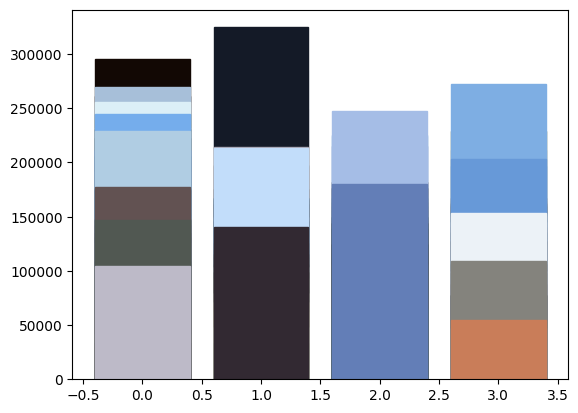

In [20]:
# Get color for all my images files
import json

def metadata_color_images():
    images = get_all_images()
    color_metadata = {}
    for image in images:
        try:
            color_metadata[image] = get_color(f"images/{image}")
            print(color_metadata)
        except Exception as e:
            continue
    with open("color_data.json","w") as file:
        json.dump(color_metadata, file, default=str, indent=4)
    return

metadata_color_images()

# III] Mise en place des tags sur les images #